<a href="https://colab.research.google.com/github/Sursuri69/Machine-Learning-LAB/blob/main/bonus-assignment-07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, header=None, names=column_names)
data.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
# Map categorical columns to numeric
data['sex'] = data['sex'].map({0: 0, 1: 1})  # Male (1) / Female (0)
data['cp'] = data['cp'].map({0: 0, 1: 1, 2: 2, 3: 3})  # Chest pain type
data['fbs'] = data['fbs'].map({0: 0, 1: 1})  # Fasting blood sugar
data['restecg'] = data['restecg'].map({0: 0, 1: 1, 2: 2})  # Resting electrocardiographic results
data['exang'] = data['exang'].map({0: 0, 1: 1})  # Exercise induced angina
data['slope'] = data['slope'].map({0: 0, 1: 1, 2: 2})  # Slope of the peak exercise ST segment
data['ca'] = data['ca'].map({0: 0, 1: 1, 2: 2, 3: 3, 4: 4})  # Number of major vessels colored by fluoroscopy
data['thal'] = data['thal'].map({3: 3, 6: 6, 7: 7})  # Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect)

# Check the data again
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,1.0,145.0,233.0,1,2,150.0,0,2.3,NaN,NaN,NaN,0
1,67.0,1,NaN,160.0,286.0,0,2,108.0,1,1.5,2.0,NaN,NaN,2
2,67.0,1,NaN,120.0,229.0,0,2,129.0,1,2.6,2.0,NaN,NaN,1
3,37.0,1,3.0,130.0,250.0,0,0,187.0,0,3.5,NaN,NaN,NaN,0
4,41.0,0,2.0,130.0,204.0,0,2,172.0,0,1.4,1.0,NaN,NaN,0


In [7]:
# Separate the features (X) and the target variable (y)
X = data.drop('target', axis=1)  # Features
y = data['target']  # Target variable

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [8]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)


Accuracy: 50.82%

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.97      0.81        29
           1       0.22      0.17      0.19        12
           2       0.14      0.11      0.12         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.51        61
   macro avg       0.21      0.25      0.23        61
weighted avg       0.40      0.51      0.44        61



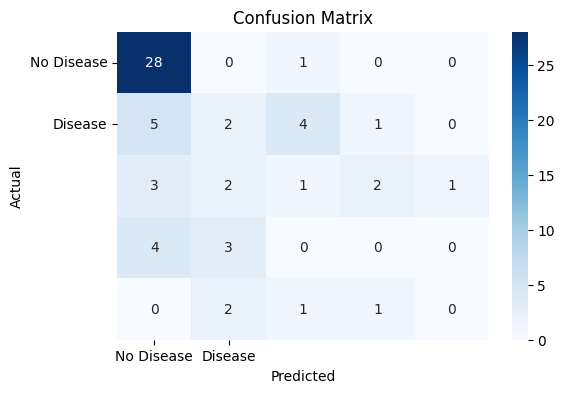

In [9]:
# Import evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required to be at a leaf node
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1,verbose=2)

grid_search.fit(X_train, y_train)

print(f"Best Hyperparameters: {grid_search.best_params_}")

best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

print(f"Best Model Accuracy: {accuracy_score(y_test, y_pred_best) * 100:.2f}%")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Model Accuracy: 50.82%


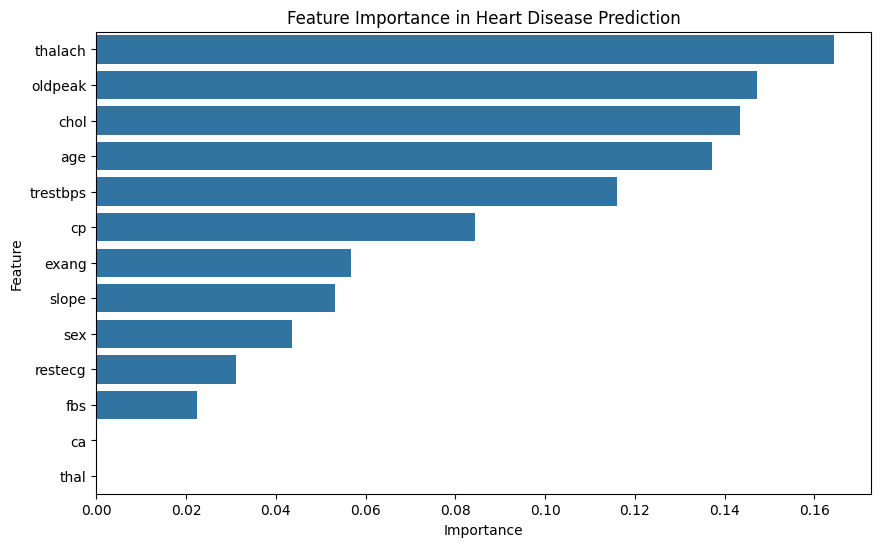

In [11]:

feature_importances = rf_model.feature_importances_

import pandas as pd
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance in Heart Disease Prediction")
plt.show()
